# Центральная предельная теорема своими руками

## Гистограмма выборки

В этом задании будем рассмотривать распределение вероятностей случайной величины Рэлея с $\sigma = 1$. Плотность вероятности для распределение Рэлея будет иметь следующий вид:

$
f(x;\sigma) = \frac {x}{\sigma^2} \,exp(-\frac {x^2}{2\sigma^2}), \,x \geq 0 , \,\sigma > 0
$

### Область применения
__Распределение Рэлея применяется для описания большого числа задач, например:__ 

$\bullet$ Задача сложения колебаний со случайными фазами;

$\bullet$ Распределение энергии излучения абсолютно черного тела;

$\bullet$ Для описания законов надежности;

$\bullet$ Для описания некоторых радиотехнических сигналов;

$\bullet$ Закону распределения Релея подчиняются амплитудные значения шумо­вых коле­баний (помех) в радиоприем­нике;

$\bullet$ Используется для описания случайной огибающей узкополосного случайного процесса(шума).

Сгенерируем из него выборку объёма 1000 и сравним гистограмму выборки с теоретической плотностью распределения случайной величины.

Text(0,0.5,'$f(x)$')

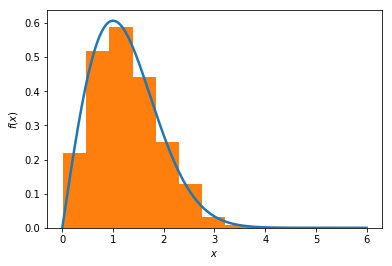

In [76]:
%matplotlib inline
import matplotlib.pyplot as pltz
import scipy.stats as sts
import numpy as np
import math

# сгенеруем выборку объема 1000 из распределения
rv = sts.rayleigh()
sample = rv.rvs(size=1000)

# определим теоритеческую плотность вероятности для распределения
x = np.linspace(0,6,1000)
pdf = rv.pdf(x) 

# построим гистограмму выборки и наложим на нее теоретическую оценку
plt.plot(x, pdf, linewidth = 2.5)
plt.hist(sample, density = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

#### Вывод:
Гистограмма выборки совпадает с теоретической оценкой плотности вероятности распределения Рэлея, о чём можно сказать, посмотрев на полученный график


## Распределение выборочных средних

Далее давайте оценим распределение выборочных средних случайной величины. Исходя из ЦПТ выборочные средние  $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ - матожидание, а $\mathbb{D}X$ - дисперсия.

In [77]:
# перед Вами функция, выводящая на экран гистограммы выборочных средних случайной величины для объема выборки n
# и теоретической оценки плотности вероятности для распределения выборочных средних

def createPDF(n): 
    # сгенерим выборочные средние по выборкам объема n
    SampleMeansList = []
    for i in range(1000):
        sample = rv.rvs(n)
        sampleMean = np.mean(sample)
        SampleMeansList.append(sampleMean)
    
    # вычислим теоритеческую плотность вероятности для нормального распределения
    mu = rv.mean()
    sigma = (rv.var()/n) ** 0.5
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим саму гистограмму выборочных средних и теоретическую оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(SampleMeansList, density = True)
    plt.title('n = %d' % n)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.show()

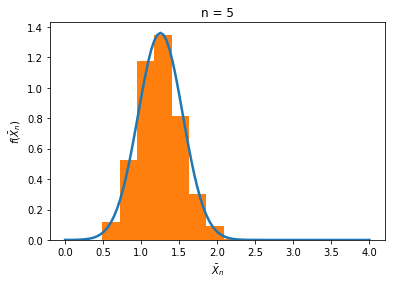

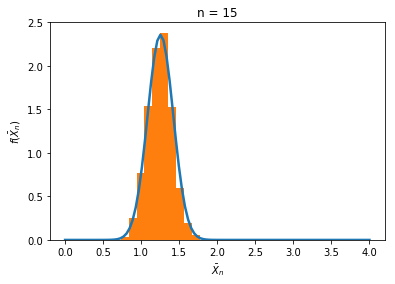

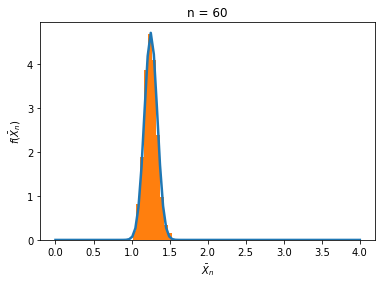

In [78]:
# для разных объёмов выборок выведем гистограммы распределений выборочных средних и приближающих их нормальных распределений
for n in [5, 15, 60]:
    createPDF(n)

#### Вывод:
С ростом объема выборки лучше получается распределение выборочных средних приближающему его нормальному распределению. 
При n = 5 распределение неточно и несимметрично, да и на нормальное распределение не очень похоже.
Но при n = 60 распределение выборочных средних вполне соответсвует нормальному распределению.